<a href="https://colab.research.google.com/github/pandashreyan/diabetes_prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreyanpanda","key":"387133113020b193d088332453430d6b"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

Dataset URL: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 16.6MB/s]


In [ ]:
!unzip /content/diabetes-dataset.zip

Archive:  /content/diabetes-dataset.zip
  inflating: diabetes.csv            


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from catboost import CatBoostClassifier  # CatBoost Classifier
from lightgbm import LGBMClassifier  # LightGBM Classifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier  # Gradient Boosting and Random Forest Classifiers
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from xgboost import XGBClassifier  # XGBoost Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression Classifier
# Data preprocessing libraries
from sklearn.preprocessing import RobustScaler  # RobustScaler for feature scaling
from sklearn.preprocessing import LabelEncoder  # LabelEncoder for encoding categorical variables
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates: 'bool | Sequence[Hashable] | None' = None, infer_datetime_format: 'bool | lib.NoDefault' = <no_default>, keep_date_col: 'bool' = False, date_parser=<no_default>, date_format: 'str | None' = None, dayfirst: 'bool' = False, cache_dates: 'bool' = True, iterator: 'bool' = False, chunksize: 'int | None' = None, compression: 'CompressionOptions' = 'infer', thousands: 'str | None' = None, decimal: 'str' = '.', lineterminator: 'str | None' = None, quotechar: 'str' = '"', quoting: 'int' = 0, doublequote: 'bool' = True, escapechar: 'str | None' = None, comment: 'str | None' = None, encoding: 'str | None' = None, encoding_errors: 'str | None' = 'strict', dialect: 'str | csv.Dialect | None' = None, on_bad_lines: 'str' = 'error', delim_whitespace: 'bool' = False, low_memory=True, memory_map: 'bool' = False, float_precision: "Literal['high', 'legacy'] | None" = None, storage_options: 'StorageOptions' = None, dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>) -> 'DataFrame | TextFileReader'>

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

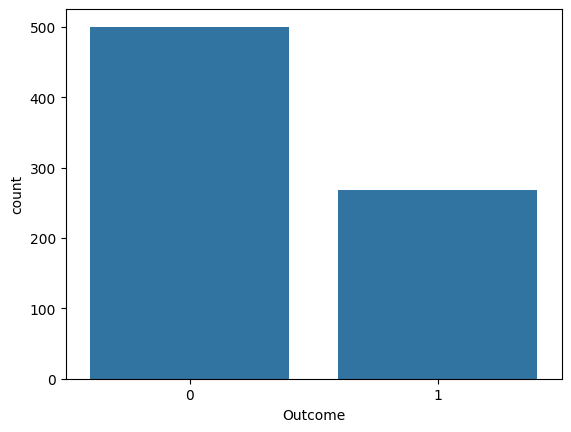

In [ ]:
sns.countplot(x="Outcome", data=diabetes_dataset)
plt.show()

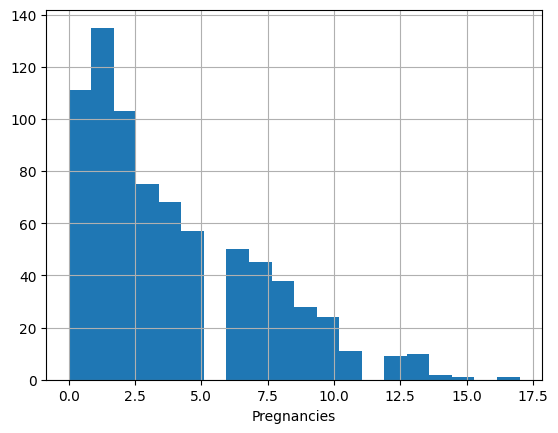

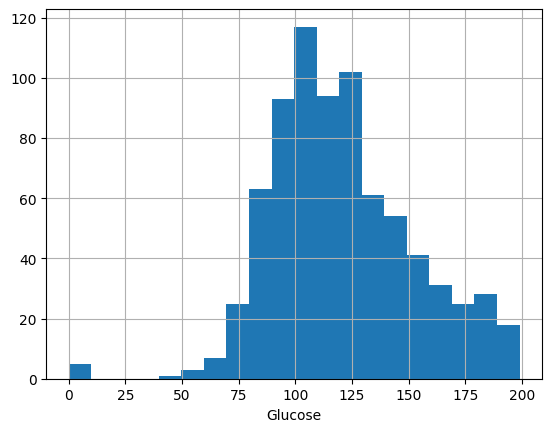

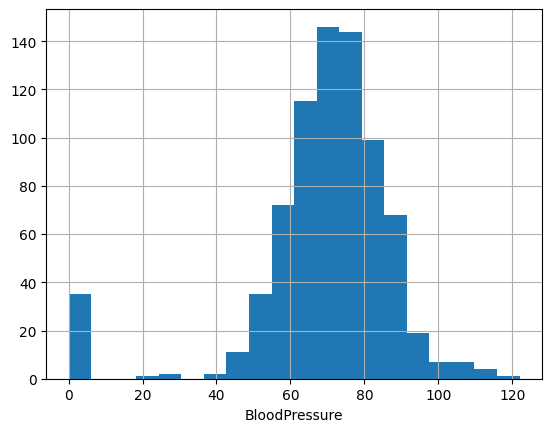

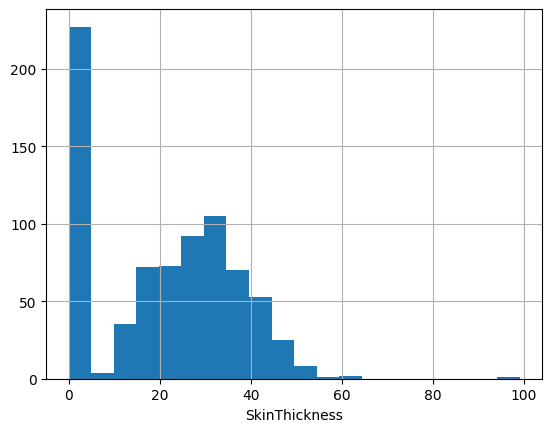

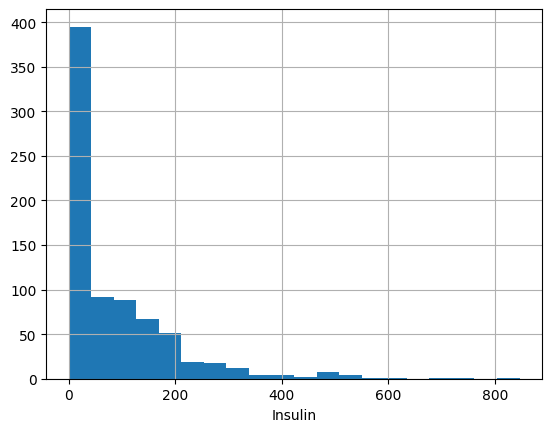

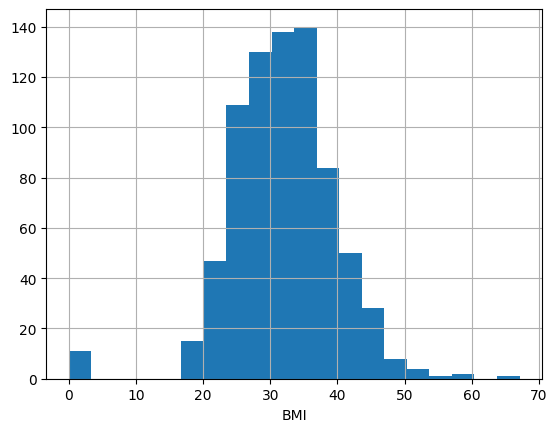

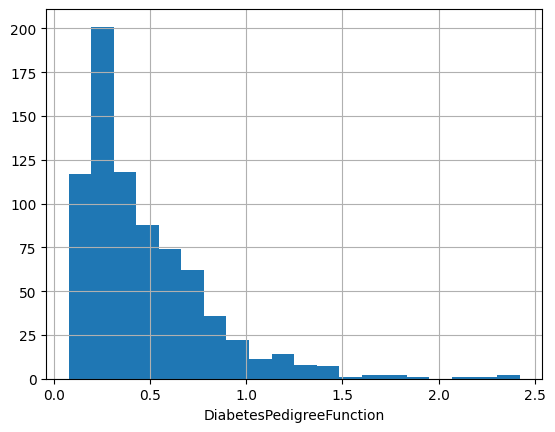

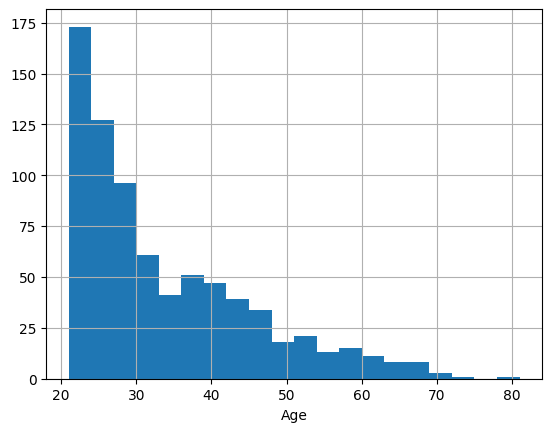

In [ ]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)


cols = [col for col in diabetes_dataset.columns if "Outcome" not in col]

for col in cols:
    plot_numerical_col(diabetes_dataset, col)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

models = {
    "CART": DecisionTreeClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=False)
}

In [ ]:
from sklearn.model_selection import GridSearchCV

catboost_params = {"iterations": [100, 200],
                   "learning_rate": [0.01, 0.1],
                   "depth": [2, 3, 8]}

In [ ]:
catboost_model = CatBoostClassifier(random_state=42, verbose=False)
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=3, n_jobs=-1, verbose=True).fit(X, Y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
# Define scoring metrics
scoring_metrics = ["accuracy", "precision"]

# Iterate over each model
for model_name, model in models.items():
    # Initialize an empty dictionary to store cross-validation results
    cv_results = {}

    # Iterate over each scoring metric
    for metric in scoring_metrics:
        # Perform cross-validation for the current model and metric
        cv_results[metric] = cross_validate(model, X, Y, cv=10, scoring={metric: metric}, error_score='raise')
        # Calculate the mean score for the current metric
        mean_score = cv_results[metric]['test_' + metric].mean()
        # Print the model name and the mean score for the current metric
        print(f"{model_name} {metric.capitalize()} score: {mean_score}")

CART Accuracy score: 0.699231032125769
CART Precision score: 0.5729269566640256
CatBoost Accuracy score: 0.7669343814080657
CatBoost Precision score: 0.7004398976982096


In [ ]:
from sklearn.model_selection import GridSearchCV

catboost_params = {"iterations": [100, 200],
                   "learning_rate": [0.01, 0.1],
                   "depth": [2, 3, 8]}

In [ ]:
catboost_model = CatBoostClassifier(random_state=42, verbose=False)
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=3, n_jobs=-1, verbose=True).fit(X, Y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=42).fit(X, Y)

In [ ]:
cv_results = cross_validate(catboost_final, X, Y, cv=10, scoring=["accuracy"])
print("accuracy score: ", cv_results["test_accuracy"].mean())

accuracy score:  0.7577922077922079


In [ ]:
cv_results = cross_validate(catboost_final, X, Y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
print("f1 score: ", cv_results['test_f1'].mean())
print("precision score: ", cv_results['test_precision'].mean())
print("recall score: ", cv_results['test_recall'].mean())
print("accuracy score: ", cv_results['test_accuracy'].mean())
print("roc_auc score: ", cv_results['test_roc_auc'].mean())

f1 score:  0.6251542778898413
precision score:  0.6919326769933176
recall score:  0.5782051282051281
accuracy score:  0.7577922077922079
roc_auc score:  0.8307806267806267


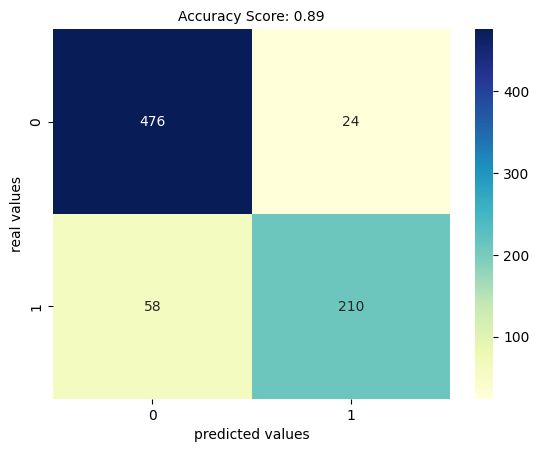

In [ ]:
# (X) parameter coming from X = df.drop(["Outcome"], axis=1)
# So it is our datafile without "Outcome" column.
y_predict = catboost_final.predict(X)

def plot_confucion_matrix(y, y_predict):
    acc = round(accuracy_score(y,y_predict), 2)
    cm = confusion_matrix(y, y_predict)
    sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'YlGnBu')
    plt.xlabel('predicted values')
    plt.ylabel('real values')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confucion_matrix(Y, y_predict)